In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2026-01-12 09:54:59.870699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768211700.105517      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768211700.178862      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768211700.731181      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768211700.731237      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768211700.731279      17 computation_placer.cc:177] computation placer alr

In [2]:
data_dir = '/kaggle/input/gtsrb-german-traffic-sign'
train_path = os.path.join(data_dir, 'Train')
test_path = os.path.join(data_dir, 'Test')

IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3
NUM_CATEGORIES = 43

print("Loading training data... this may take a minute.")
data = []
labels = []

for i in range(NUM_CATEGORIES):
    path = os.path.join(train_path, str(i))
    images = os.listdir(path)

    for img in images:
        try:
            image = Image.open(os.path.join(path, img))
            image = image.resize((IMG_HEIGHT, IMG_WIDTH))
            image = np.array(image)

            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

print("Data loaded!")
print(f"Total images: {data.shape[0]}, Image shape: {data.shape[1:]}")

Loading training data... this may take a minute.
Data loaded!
Total images: 39209, Image shape: (30, 30, 3)


In [3]:
'''
Split the data using test_train_split into X_train, X_val, y_train, y_val and normalize the data
'''


X_train, X_val, y_train, y_val = train_test_split(data,labels,test_size=0.2)
X_train =X_train/255.0
X_val =X_val/255.0

num_classes = 43 
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
print(f"Pre-processing complete. X_train shape: {X_train.shape}")

# TODO: One-hot encode the labels "y_train and y_val"

Pre-processing complete. X_train shape: (31367, 30, 30, 3)


In [4]:
# Write the CNN code below with Maxpool layer, dropout rate, flatten it
model = Sequential([
    # First Convolutional Block
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),

    # Second Convolutional Block
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),

    # Flattening and Dense Layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(num_classes, activation='softmax')
    
])

# After this compile the model using categorical_crossentropy loss, use adam optimizer and accuracy metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-12 09:59:50.756216: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 69s 136ms/step - accuracy: 0.3105 - loss: 2.5495 - val_accuracy: 0.9478 - val_loss: 0.2038
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 65s 133ms/step - accuracy: 0.8960 - loss: 0.3415 - val_accuracy: 0.9774 - val_loss: 0.0794
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 66s 134ms/step - accuracy: 0.9501 - loss: 0.1732 - val_accuracy: 0.9844 - val_loss: 0.0583
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 82s 135ms/step - accuracy: 0.9640 - loss: 0.1161 - val_accuracy: 0.9856 - val_loss: 0.0478
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 62s 126ms/step - accuracy: 0.9704 - loss: 0.0980 - val_accuracy: 0.9935 - val_loss: 0.0263
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 64s 130ms/step - accuracy: 0.9754 - loss: 0.0803 - val_accuracy: 0.9934 - val_loss: 0.0272
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 53s 107ms/step - accuracy: 0.9781 - loss: 0.0702 - val_accuracy: 0.9943 - val_loss: 0.0261
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 43s 88ms/step - accuracy: 0.9832 - loss: 0.

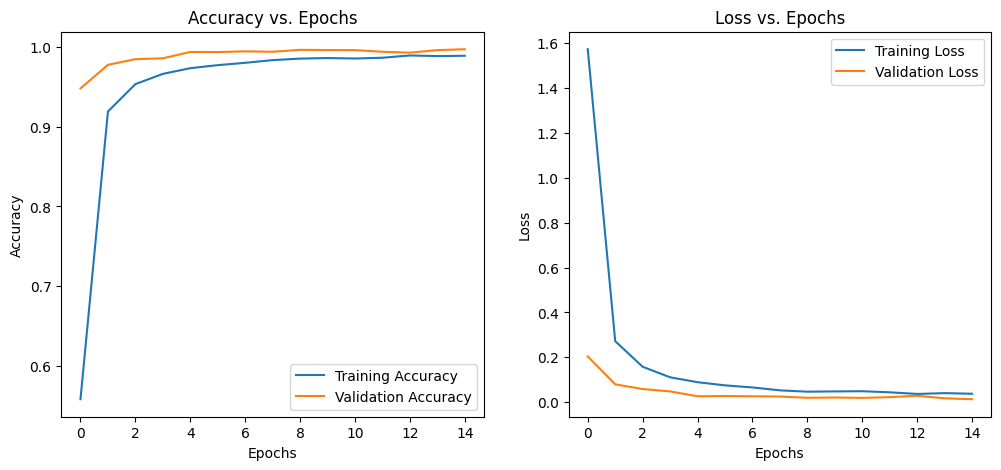

Loading test images...
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step


Test Data Accuracy: 97.70%
Model saved successfully!


In [5]:
# Decide epochs and batch_size which fits best for your model
epochs = 15
batch_size=64

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs, 
    validation_data=(X_val, y_val)
)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_test = pd.read_csv(os.path.join(data_dir, 'Test.csv'))
labels_test = y_test["ClassId"].values
imgs = y_test["Path"].values
data_test = []

print("Loading test images...")
for img in imgs:
    image = Image.open(os.path.join(data_dir, img))
    image = image.resize((IMG_HEIGHT, IMG_WIDTH))
    data_test.append(np.array(image))

X_test = np.array(data_test)
X_test = X_test / 255.0

pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)

from sklearn.metrics import accuracy_score
print(f"Test Data Accuracy: {accuracy_score(labels_test, pred_classes)*100:.2f}%")

model.save("traffic_classifier.h5")
print("Model saved successfully!")